<a href="https://colab.research.google.com/github/pragati72448/flight_booking_price_prediction/blob/main/Copy_of_Flight_Booking_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from warnings import WarningMessage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

importing the dataset (.csv) into pandas

In [ ]:
data = pd.read_csv('/content/Flight_Booking.csv')[:10000]
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.shape

(10000, 12)

In [ ]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
9995,9995,Air_India,AI-506,Delhi,Morning,zero,Afternoon,Bangalore,Economy,2.75,1,7425
9996,9996,Air_India,AI-502,Delhi,Afternoon,zero,Evening,Bangalore,Economy,2.75,1,7425
9997,9997,Air_India,AI-504,Delhi,Night,zero,Late_Night,Bangalore,Economy,2.92,1,7425
9998,9998,AirAsia,I5-548,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,7.58,1,7423
9999,9999,AirAsia,I5-764,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,10.33,1,7423


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   airline           10000 non-null  object 
 2   flight            10000 non-null  object 
 3   source_city       10000 non-null  object 
 4   departure_time    10000 non-null  object 
 5   stops             10000 non-null  object 
 6   arrival_time      10000 non-null  object 
 7   destination_city  10000 non-null  object 
 8   class             10000 non-null  object 
 9   duration          10000 non-null  float64
 10  days_left         10000 non-null  int64  
 11  price             10000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [ ]:
data = data.drop(columns=["Unnamed: 0"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10000 non-null  object 
 1   flight            10000 non-null  object 
 2   source_city       10000 non-null  object 
 3   departure_time    10000 non-null  object 
 4   stops             10000 non-null  object 
 5   arrival_time      10000 non-null  object 
 6   destination_city  10000 non-null  object 
 7   class             10000 non-null  object 
 8   duration          10000 non-null  float64
 9   days_left         10000 non-null  int64  
 10  price             10000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 859.5+ KB


In [ ]:
data.shape

(10000, 11)

In [ ]:
data.describe()

,duration,days_left,price
count,10000.000000,10000.000000,10000.000000
mean,9.526125,25.871100,6062.283100
std,7.047044,13.641888,3782.797158
min,2.000000,1.000000,2281.000000
25%,2.330000,14.000000,3102.000000
50%,7.670000,26.000000,5301.000000
75%,13.750000,38.000000,6737.000000
max,30.080000,49.000000,31260.000000


In [ ]:
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


Text(0, 0.5, 'Values')

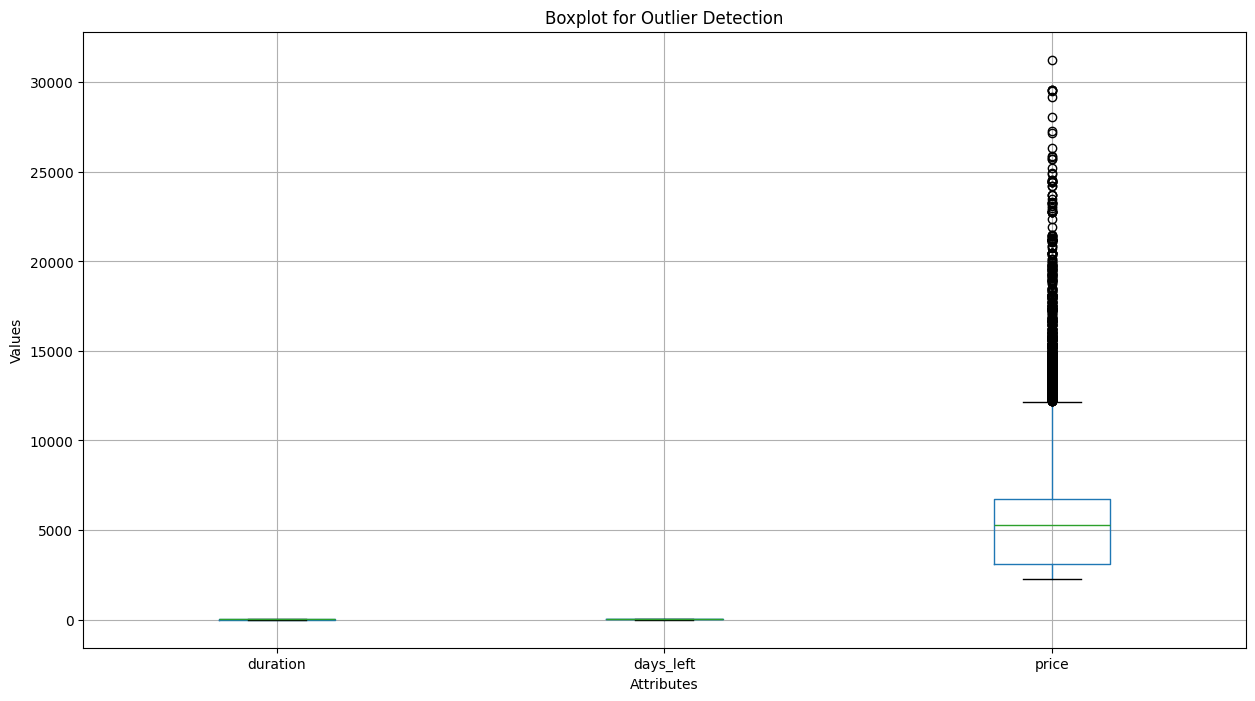

In [ ]:
# checking for outliers
plt.figure(figsize=(15,8))
data.boxplot()
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Attributes')
plt.ylabel('Values')

<ipython-input-12-02e5aa6e1ed0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

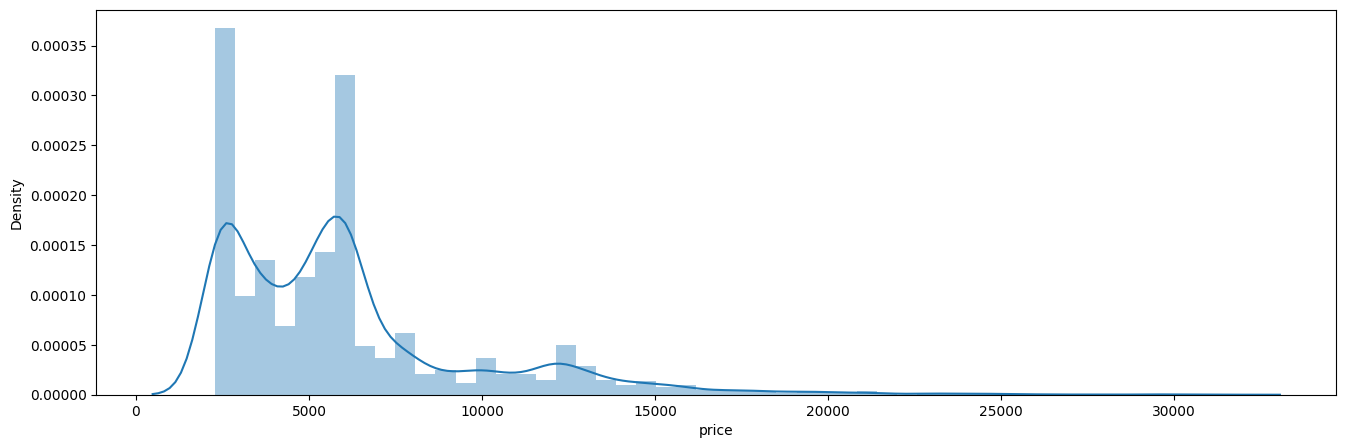

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(data['price'])

<Axes: ylabel='price'>

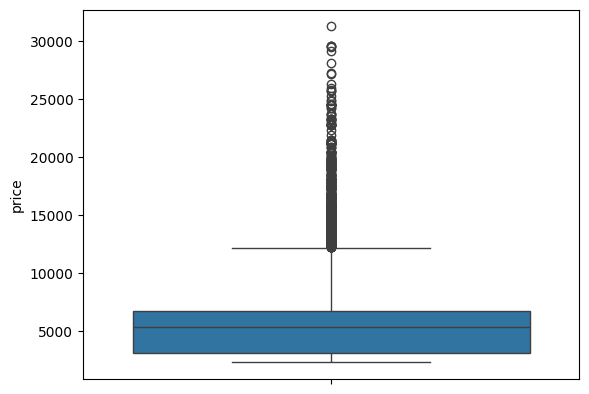

In [ ]:
sns.boxplot(data['price'])

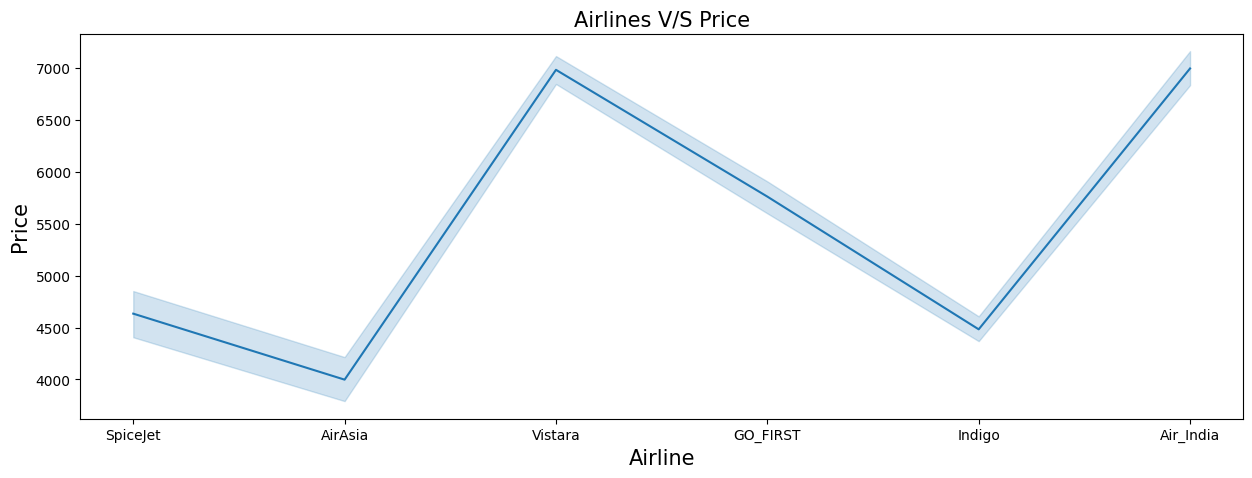

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x= data['airline'], y = data['price'])
plt.title('Airlines V/S Price', fontsize= 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

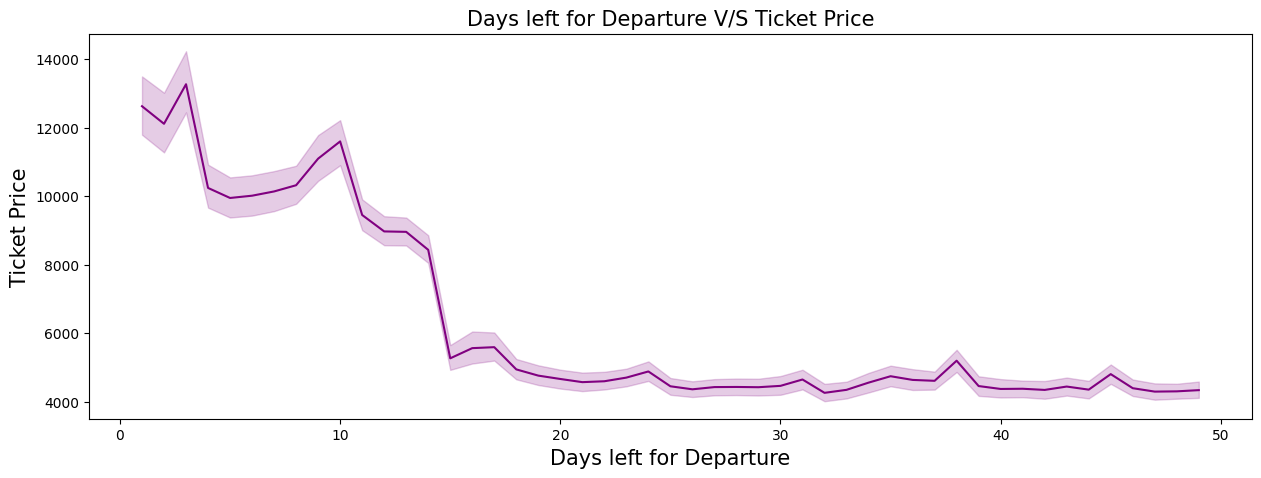

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x= data['days_left'], y = data['price'], color = 'purple')
plt.title('Days left for Departure V/S Ticket Price', fontsize = 15)
plt.xlabel('Days left for Departure', fontsize = 15)
plt.ylabel('Ticket Price', fontsize = 15)
plt.show()

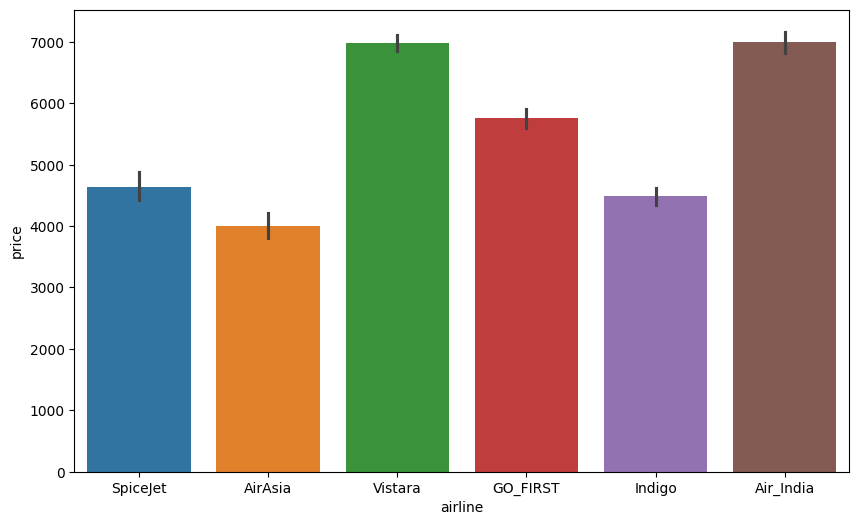

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(x= data['airline'], y= data['price'], hue = data['airline'])
plt.show()

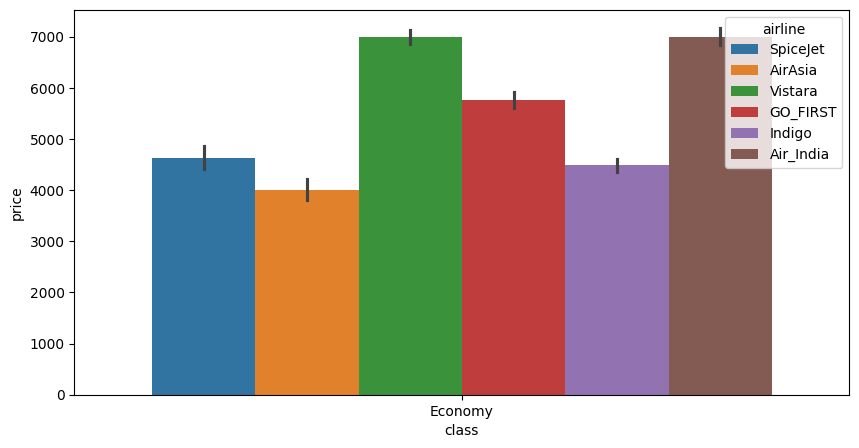

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(x = data['class'], y = data['price'], hue = data['airline'])
plt.show()

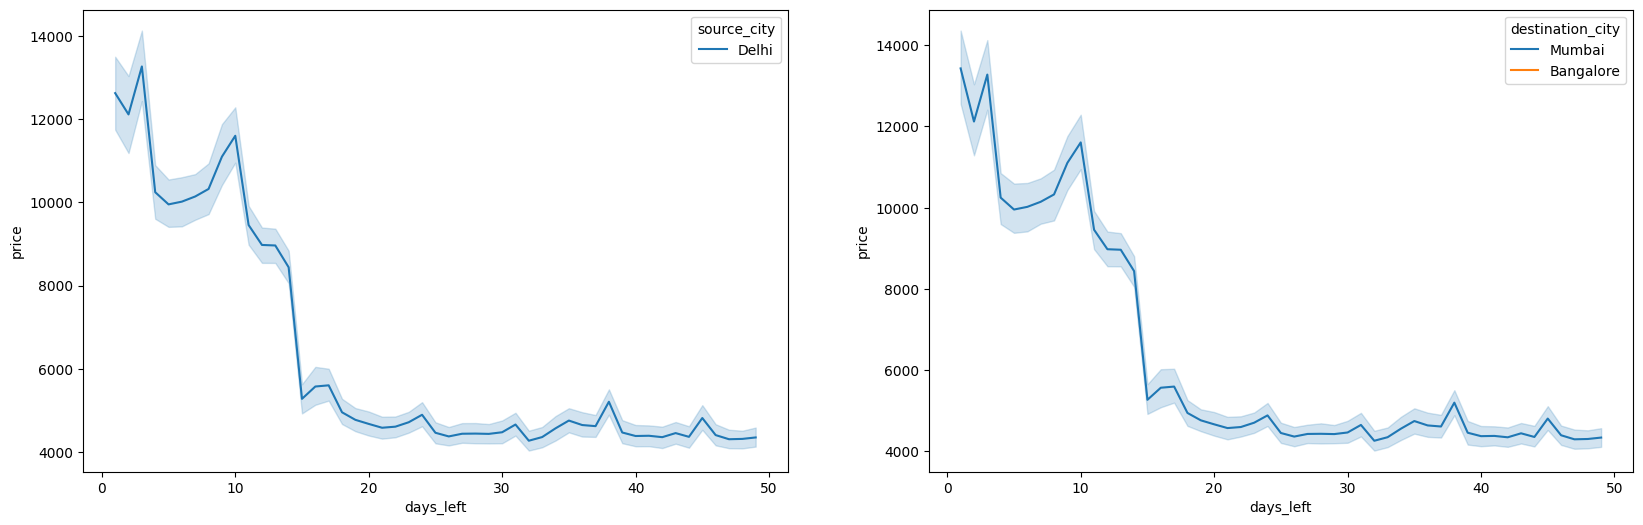

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (20,6))
sns.lineplot(x= data['days_left'], y = data['price'], ax = ax[0], hue = data['source_city'])
sns.lineplot(x= data['days_left'], y= data['price'], ax= ax[1], hue= data['destination_city'])
plt.show()

<Figure size 1500x1200 with 0 Axes>

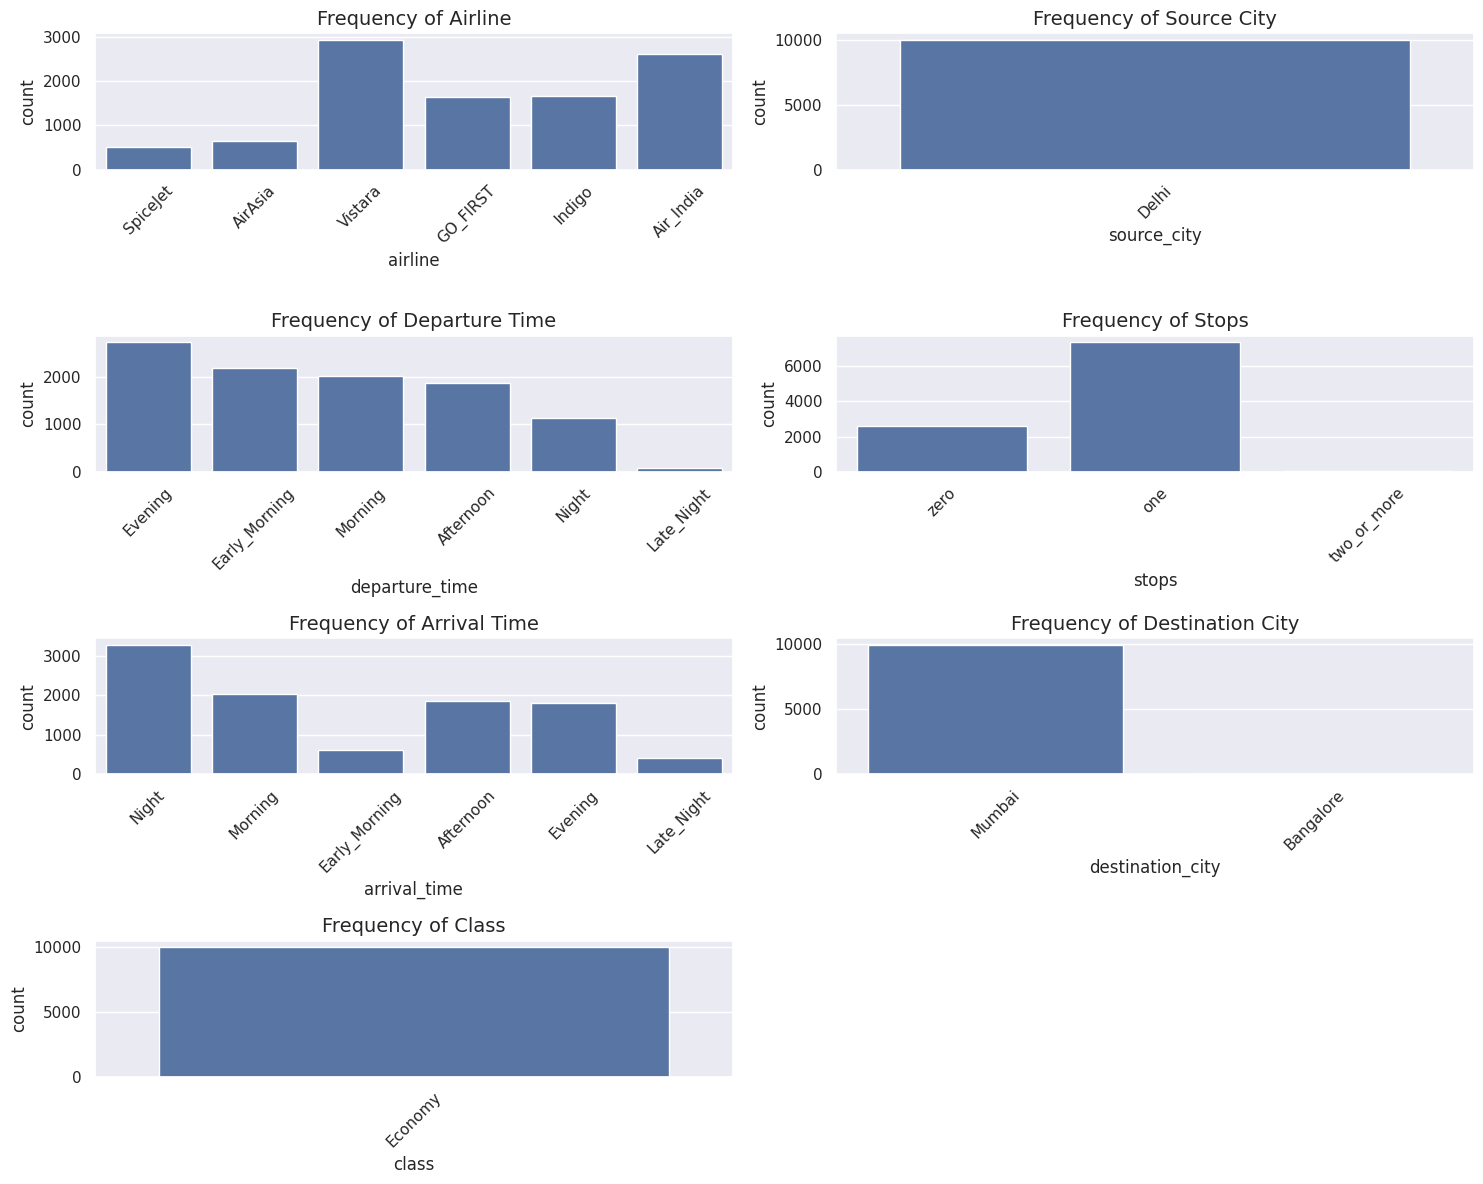

In [ ]:
plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

# Create plots and assign each plot to the respective axes
sns.countplot(x=data['airline'], ax=axes[0, 0])
axes[0, 0].set_title("Frequency of Airline", fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x=data['source_city'], ax=axes[0, 1])
axes[0, 1].set_title("Frequency of Source City", fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x=data['departure_time'], ax=axes[1, 0])
axes[1, 0].set_title("Frequency of Departure Time", fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x=data['stops'], ax=axes[1, 1])
axes[1, 1].set_title("Frequency of Stops", fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(x=data['arrival_time'], ax=axes[2, 0])
axes[2, 0].set_title("Frequency of Arrival Time", fontsize=14)
axes[2, 0].tick_params(axis='x', rotation=45)

sns.countplot(x=data['destination_city'], ax=axes[2, 1])
axes[2, 1].set_title("Frequency of Destination City", fontsize=14)
axes[2, 1].tick_params(axis='x', rotation=45)

sns.countplot(x=data['class'], ax=axes[3, 0])
axes[3, 0].set_title("Frequency of Class", fontsize=14)
axes[3, 0].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
axes[3, 1].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['airline']= le.fit_transform(data['airline'])
data['flight']= le.fit_transform(data['flight'])
data['source_city']= le.fit_transform(data['source_city'])
data['departure_time']= le.fit_transform(data['departure_time'])
data['stops']= le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class']= le.fit_transform(data['class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10000 non-null  int64  
 1   flight            10000 non-null  int64  
 2   source_city       10000 non-null  int64  
 3   departure_time    10000 non-null  int64  
 4   stops             10000 non-null  int64  
 5   arrival_time      10000 non-null  int64  
 6   destination_city  10000 non-null  int64  
 7   class             10000 non-null  int64  
 8   duration          10000 non-null  float64
 9   days_left         10000 non-null  int64  
 10  price             10000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 859.5 KB


Feature Selection

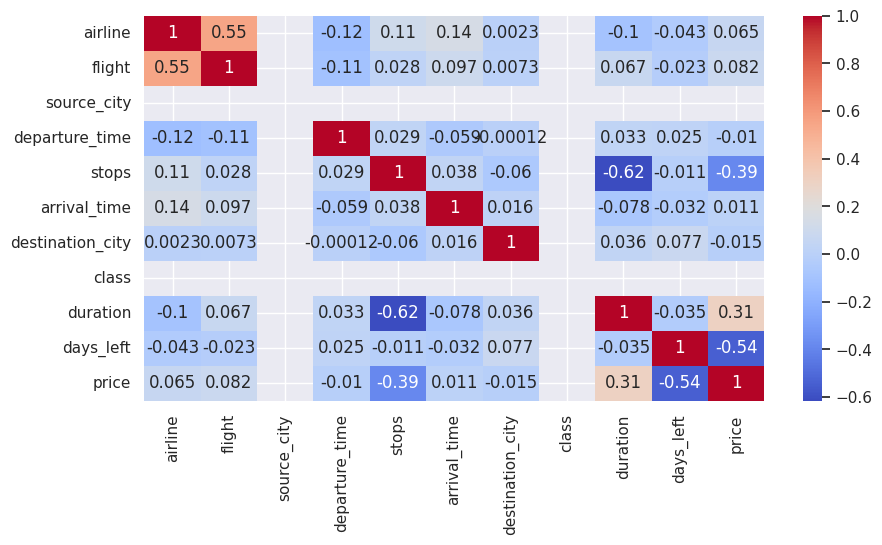

In [ ]:
#Ensuring the data has only numeric columns
numeric_data = data.select_dtypes(include=['number'])
numeric_data= numeric_data.fillna(0)
#creating the heatmap
plt.figure(figsize= (10,5))
sns.heatmap(numeric_data.corr(), annot= True, cmap="coolwarm")
plt.show()

In [ ]:
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   5.366848
1            flight   6.929341
2       source_city        NaN
3    departure_time   2.750100
4             stops   2.202361
5      arrival_time   3.577775
6  destination_city  18.100284
7             class        NaN
8          duration   4.689265
9         days_left   4.653947


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Applying Linear Regression

In [ ]:
X = data.drop(columns= ['price'])
y = data['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"])
print(difference)

      Actual_Value  Predicted_Value
0           3100.0      3118.865200
1           2410.0      3478.986941
2           6585.0      5560.574385
3           3519.0      7122.607147
4           3835.0      7751.978068
...            ...              ...
1995        2410.0      2386.429211
1996        6296.0      5011.705895
1997        6296.0      5188.440061
1998       16665.0      9231.036653
1999        4967.0      5159.272687

[2000 rows x 2 columns]


In [ ]:
from sklearn.metrics import r2_score
print("The r2 Score using Linear Regression is : " ,r2_score(y_test, y_pred))
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("The mean absolute error (MAE) using Linear Regression is : " ,mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_abs_per_error = mean_absolute_percentage_error(y_test, y_pred)
print("The mean absolute percentage error (MAPE) using Linear Regression is : " ,mean_abs_per_error)
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) using Linear Regression is : " ,mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) using Linear Regression is : " ,root_mean_sq_error)

The r2 Score using Linear Regression is :  0.46896318587698416
The mean absolute error (MAE) using Linear Regression is :  2040.2046750385425
The mean absolute percentage error (MAPE) using Linear Regression is :  0.4047096040868526
The mean squared error (MSE) using Linear Regression is :  7647848.058505104
The root mean squared error (RMSE) using Linear Regression is :  2765.4742917816293


Plotting the graph of actual
and predicted price of flight


<ipython-input-27-aa72c6bed542>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = "Actual")
<ipython-input-27-aa72c6bed542>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "Predicted")


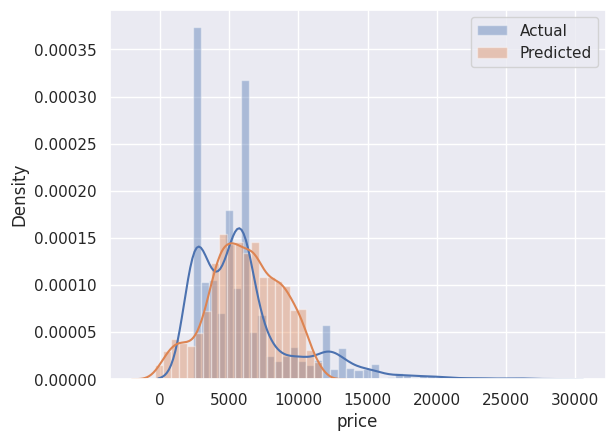

In [ ]:
sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred, label = "Predicted")
plt.legend()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("The r2 score using Decision Tree is : ",r2_score(y_test, y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("The mean absolute error (MAE) using Decision Tree is : ", mean_abs_error)
mean_abs_per_error = mean_abs_per_error = mean_absolute_percentage_error(y_test, y_pred)
print("The mean absolute percentage error (MAPE) using Decision Tree is : " , mean_abs_per_error)
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) using Decision Tree is : " ,mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) using Decision Tree is : " , root_mean_sq_error)

The r2 score using Decision Tree is :  0.712665168251255
The mean absolute error (MAE) using Decision Tree is :  687.126
The mean absolute percentage error (MAPE) using Decision Tree is :  0.09288168514106666
The mean squared error (MSE) using Decision Tree is :  4138118.256
The root mean squared error (RMSE) using Decision Tree is :  2034.2365290201628


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print("The r2 score using Random Forest is : ",r2_score(y_test, y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("The mean absolute error (MAE) Random Forest is : ", mean_abs_error)
mean_abs_per_error = mean_abs_per_error = mean_absolute_percentage_error(y_test, y_pred)
print("The mean absolute percentage error (MAPE) using Random Forest is : " , mean_abs_per_error)
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) using Random Forest is : " ,mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) using Random Forest is : " , root_mean_sq_error)

The r2 score using Random Forest is :  0.8546296234796753
The mean absolute error (MAE) Random Forest is :  594.7981649999999
The mean absolute percentage error (MAPE) using Random Forest is :  0.08317343709005261
The mean squared error (MSE) using Random Forest is :  2093584.70499105
The root mean squared error (RMSE) using Random Forest is :  1446.9224944657713


<ipython-input-30-c98ce6036ab4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = "Actual_Value")
<ipython-input-30-c98ce6036ab4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "Predicted_Value")


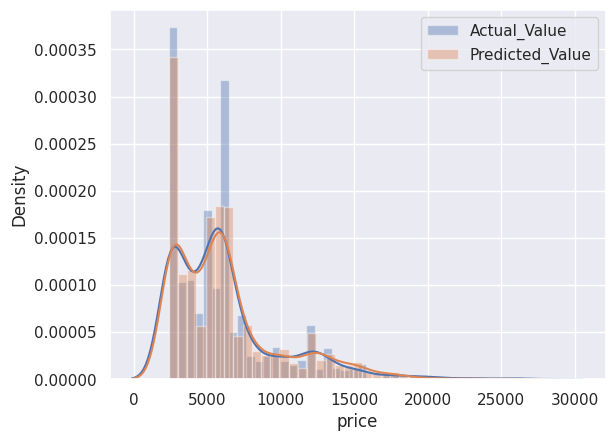

In [ ]:
sns.distplot(y_test, label = "Actual_Value")
sns.distplot(y_pred, label = "Predicted_Value")
plt.legend()

using validation techniques

In [ ]:
from sklearn.model_selection import cross_val_score
cv_folds = 5

linear_regression_score = cross_val_score(lr, X, y, cv= cv_folds, scoring = 'r2')
print('The linear regression R-Squared scores : ', linear_regression_score)
print('The linear regression Mean R-Squared scores : ', linear_regression_score.mean())

decision_tree_score = cross_val_score(dt, X, y, cv = cv_folds, scoring = 'r2')
print('The decision tree R-Squared scores : ', decision_tree_score)
print('The decision tree Mean R-Squared scores : ', decision_tree_score.mean())

random_forest_score = cross_val_score(rfr, X, y, cv = cv_folds, scoring = 'r2')
print('The random forest R-Squared scores : ', random_forest_score)
print('The random forest Mean R-Squared scores : ', random_forest_score.mean())

The linear regression R-Squared scores :  [-0.5893026   0.03259204 -0.61699467  0.23264237 -2.09379865]
The linear regression Mean R-Squared scores :  -0.6069723044626418
The decision tree R-Squared scores :  [-0.16359355  0.35878349  0.73951629  0.23421683  0.64421222]
The decision tree Mean R-Squared scores :  0.36262705655663224
The random forest R-Squared scores :  [0.3801332  0.43494699 0.79516639 0.7311817  0.72652053]
The random forest Mean R-Squared scores :  0.613589761843798


Using Shapely Additive Explanation (SHAP)

Since Random Forest Algorithm worked the best out of all three, we would use SHAP on this algorithm

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rfr)
shap_values = explainer.shap_values(x_test)

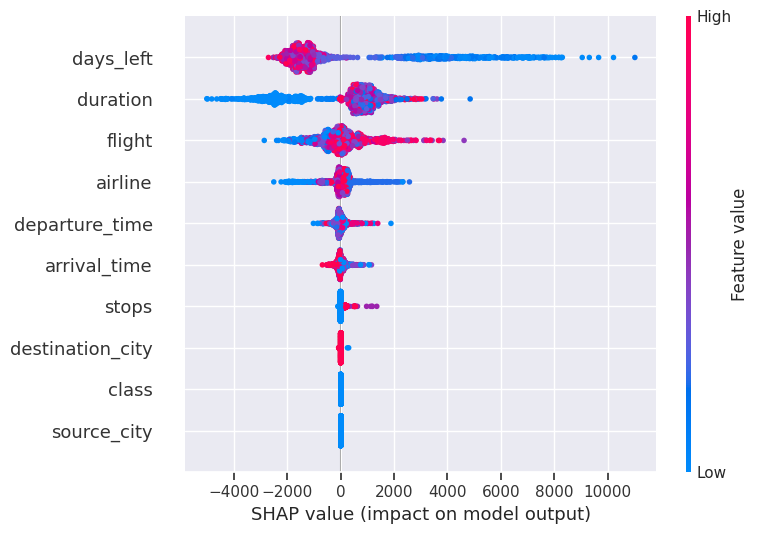

In [ ]:
#Global Summary plot shows all important features across all predictions
x_test_data = pd.DataFrame(x_test, columns=['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'duration', 'days_left'])
shap.summary_plot(shap_values, x_test_data)


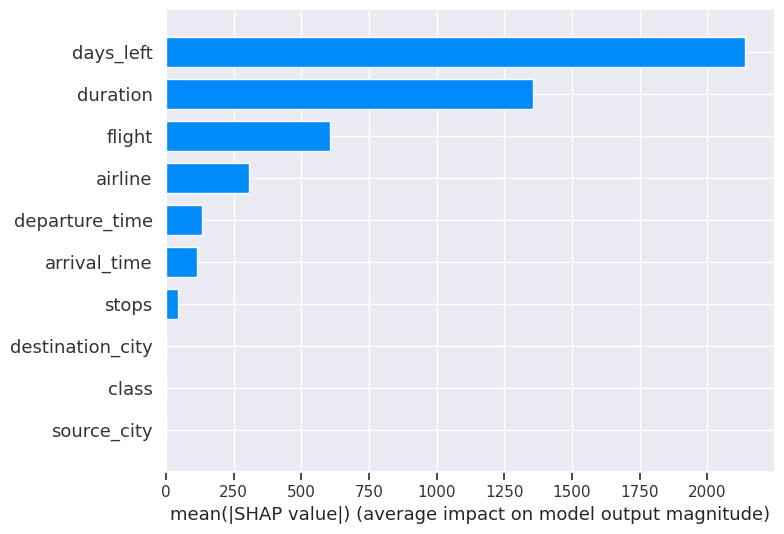

In [ ]:
#simpler version of summary plot, the bar plot
shap.summary_plot(shap_values, x_test_data, plot_type="bar")

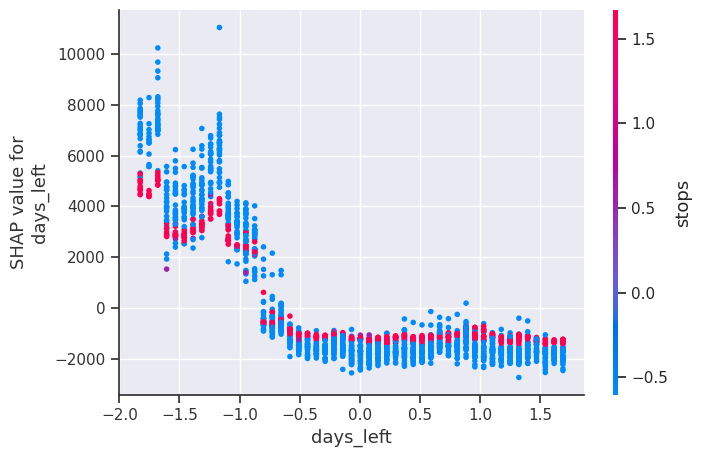

In [ ]:
#dependence plot of days_left
shap.dependence_plot('days_left', shap_values, x_test_data)

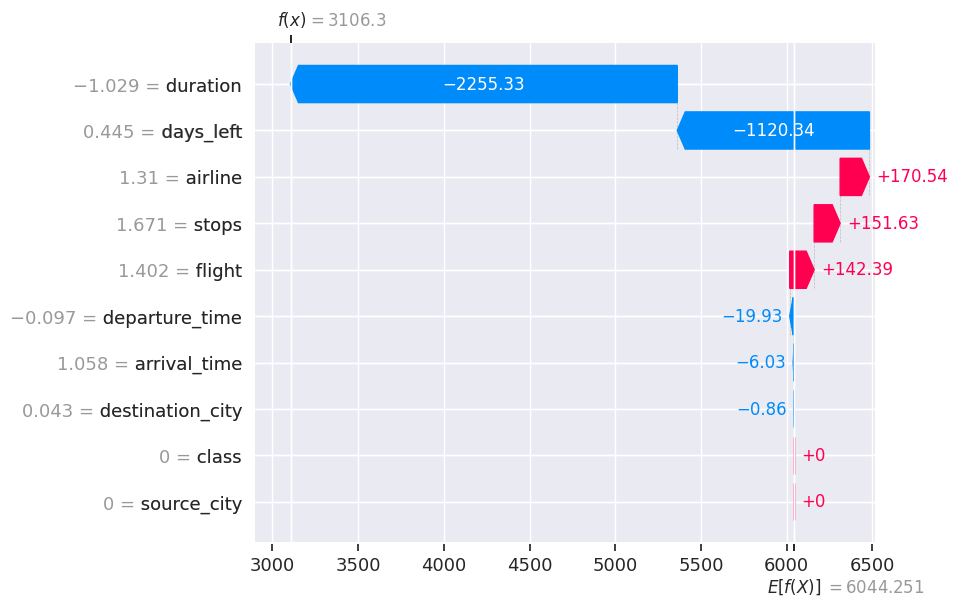

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=x_test_data.iloc[0]))